In [1]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import json

In [2]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48..."
...,...,...,...,...,...,...,...,...,...,...,...
4391,2195,Al,0.195201,-0.050495,0.220449,-832.289776,-832.340271,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1066.0, 304.0, 0.0, 154.0, 0.0, 0.0, 548.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4392,2196,Mg,0.189366,0.010789,0.183972,-832.340271,-832.329481,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1..."
4393,2196,Mg,0.178577,-0.010789,0.183972,-832.329481,-832.340271,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4394,2197,Al,0.993346,0.163984,0.911354,-832.340271,-832.176286,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1077.0, 293.0, 0.0, 154.0, 0.0, 0.0, 549.0, 1..."


In [3]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

df = df[2260:]

df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end
2260,1130,Al,0.551454,-0.017951,0.560429,-914.514712,-914.532663,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21...."
2261,1130,Al,0.569405,0.017951,0.560429,-914.532663,-914.514712,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21...."
2262,1131,Zn,0.323667,-0.015743,0.331539,-914.514712,-914.530456,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21...."
2263,1131,Zn,0.339410,0.015743,0.331539,-914.530456,-914.514712,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21...."
2264,1132,Al,0.963559,-0.112681,1.019899,-914.191045,-914.303726,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1354.0, 67.0, 85.0, 3.0, 7.0, 8.0, 690.0, 21...."
...,...,...,...,...,...,...,...,...,...,...,...
4391,2195,Al,0.195201,-0.050495,0.220449,-832.289776,-832.340271,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1066.0, 304.0, 0.0, 154.0, 0.0, 0.0, 548.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4392,2196,Mg,0.189366,0.010789,0.183972,-832.340271,-832.329481,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1..."
4393,2196,Mg,0.178577,-0.010789,0.183972,-832.329481,-832.340271,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4394,2197,Al,0.993346,0.163984,0.911354,-832.340271,-832.176286,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1077.0, 293.0, 0.0, 154.0, 0.0, 0.0, 549.0, 1..."


In [4]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,1663.500000,0.371344,0.000000,0.371344,-902.960795,-902.960795
std,308.377103,0.170057,0.093385,0.163521,22.613573,22.613573
min,1130.000000,-0.192019,-0.509654,-0.176685,-937.655003,-937.655003
25%,1396.750000,0.252368,-0.053143,0.251968,-918.422086,-918.422086
50%,1663.500000,0.377587,0.000000,0.372742,-901.247888,-901.247888
75%,1930.250000,0.492289,0.053143,0.487615,-880.189325,-880.189325
max,2197.000000,1.076240,0.509654,1.019899,-832.128269,-832.128269


In [5]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [6]:
# np.linalg.norm(a-b)

In [7]:
df = df.sample(frac=1)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [8]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [9]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [10]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(1154, 42)
(1067, 1521)
(278, 1521)
(291, 1521)


In [11]:
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

PCS Dimensionality Reduction
5 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 88.09523809523809%
PCS Dimensionality Reduction
298 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 80.40762656147271%
PCS Dimensionality Reduction
189 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 87.57396449704143%
PCS Dimensionality Reduction
191 principal components are needed to represent 99.9% of the total variation
The percentage reduction in dimension is: 87.44247205785666%


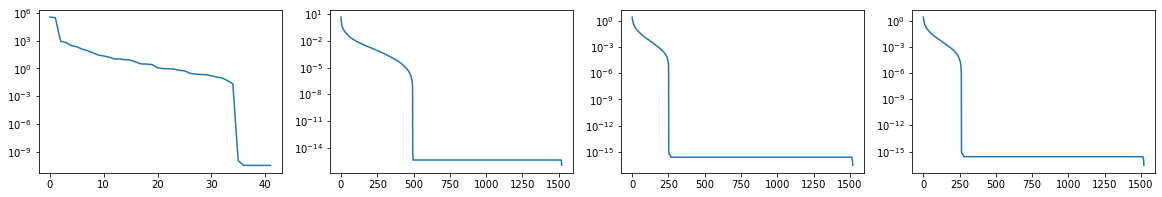

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S, S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99.9
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [13]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 250

In [14]:
x_train = x_train[:,:NUM_FEATURES_1]
x_test = x_test[:,:NUM_FEATURES_1]

In [15]:
x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [16]:
lamd = 0.05
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [17]:
def pred_energy_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2]))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2]))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2]))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_end'])[:NUM_FEATURES_1]) - np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               
df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)
df_train['predicted_energy'] = df_train.apply(lambda row: pred_energy_ls(row), axis=1)
df_test['predicted_energy'] = df_test.apply(lambda row: pred_energy_ls(row), axis=1)


df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['predicted_e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['predicted_e0'] + 0.5*df_test['predicted_de']

In [18]:
theta

array([ 0.42774733,  0.41842144,  0.47427999,  0.43988075,  0.4425583 ,
        0.51491271, -0.19341497, -0.18308221, -0.16718744, -0.16965055,
       -0.1450089 , -0.15988128, -0.25758812, -0.22215383, -0.22463898,
       -0.20973384, -0.23039696, -0.22556939, -0.04066479, -0.00235525,
       -0.02026519,  0.02626626,  0.00412211,  0.00913221, -0.02147402,
       -0.02003621, -0.00640782, -0.01413885, -0.00798134,  0.00517373,
       -0.05730029, -0.04915708, -0.07096166, -0.02502451,  0.00284963,
       -0.04665781, -0.08047584, -0.05867568, -0.0627393 , -0.02982812,
       -0.03841734, -0.04750805])

In [18]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
3178,1589,Al,0.545971,0.001524,0.545209,-917.114567,-917.113043,"[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1362.0, 38.0, 108.0, 0.0, 8.0, 8.0, 692.0, 13...","[1361.0, 39.0, 108.0, 0.0, 8.0, 8.0, 690.0, 13...",-917.143030,0.570134,0.110989,0.625629
2478,1239,Al,0.212862,-0.085288,0.255506,-896.038358,-896.123646,"[0.0, 0.25, 0.75, 0.0, 0.25, 0.75, 1.0, 0.0, 0...","[0.0, 0.25, 0.75, 0.0, 0.25, 0.75, 1.0, 0.0, 0...","[1302.0, 27.0, 149.0, 2.0, 16.0, 28.0, 660.0, ...","[1305.0, 25.0, 148.0, 2.0, 16.0, 28.0, 657.0, ...",-895.673740,0.292371,-0.037112,0.273815
2342,1171,Al,0.505975,0.024014,0.493968,-901.465046,-901.441032,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1302.0, 174.0, 0.0, 48.0, 0.0, 0.0, 660.0, 69...","[1299.0, 177.0, 0.0, 48.0, 0.0, 0.0, 657.0, 72...",-901.168099,0.533972,0.021616,0.544780
4320,2160,Al,0.692180,0.039301,0.672529,-935.641779,-935.602477,"[0.5, 0.5, 0.0, 0.75, 0.0, 0.25, 1.0, 0.0, 0.0...","[0.5, 0.5, 0.0, 0.75, 0.0, 0.25, 1.0, 0.0, 0.0...","[1441.0, 26.0, 48.0, 1.0, 6.0, 2.0, 722.0, 12....","[1440.0, 26.0, 49.0, 1.0, 6.0, 2.0, 722.0, 12....",-935.759010,0.691543,0.058130,0.720607
4362,2181,Al,0.504907,-0.028751,0.519283,-934.512660,-934.541411,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1437.0, 0.0, 78.0, 0.0, 0.0, 9.0, 722.0, 0.0,...","[1437.0, 0.0, 78.0, 0.0, 0.0, 9.0, 722.0, 0.0,...",-934.361995,0.531090,0.063370,0.562775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,2102,Al,0.484459,-0.048287,0.508602,-937.298399,-937.346686,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1437.0, 78.0, 0.0, 9.0, 0.0, 0.0, 722.0, 32.0...","[1437.0, 78.0, 0.0, 9.0, 0.0, 0.0, 722.0, 32.0...",-937.437305,0.531090,0.093296,0.577739
2497,1248,Al,0.394175,0.157755,0.315298,-895.332394,-895.174639,"[0.0, 0.25, 0.75, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0...","[0.0, 0.25, 0.75, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0...","[1305.0, 11.0, 162.0, 0.0, 11.0, 35.0, 657.0, ...","[1302.0, 12.0, 164.0, 0.0, 11.0, 35.0, 660.0, ...",-894.924002,0.303127,0.091176,0.348715
2455,1227,Mg,0.225766,0.164575,0.143478,-897.569757,-897.405182,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[1302.0, 65.0, 109.0, 2.0, 23.0, 23.0, 660.0, ...","[1302.0, 61.0, 109.0, 5.0, 24.0, 23.0, 660.0, ...",-897.274087,0.159460,0.023109,0.171014
4332,2166,Al,0.534767,-0.006965,0.538249,-935.342851,-935.349816,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1437.0, 18.0, 60.0, 0.0, 6.0, 3.0, 722.0, 8.0...","[1437.0, 18.0, 60.0, 0.0, 6.0, 3.0, 722.0, 8.0...",-935.238912,0.531090,0.055009,0.558595


rmse train 0.1948825172657875
rmse test 0.203699629060434


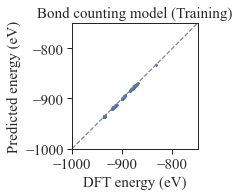

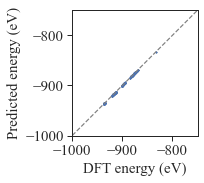

In [19]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Training)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
    
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_start'], df_train['predicted_energy'])))
##################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['energy_start'], df_test['predicted_energy'])))

rmse train 0.10018211885111701
rmse test 0.10354956352663565


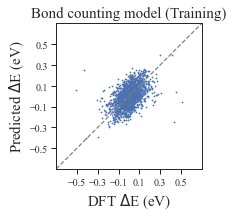

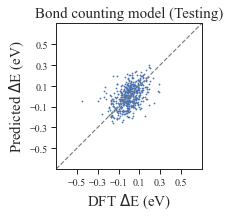

In [20]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Training)')
    ax.set_xlabel(xlabel='DFT $\Delta$E (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\Delta$E (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])))

rmse train 0.02179953087372316
rmse test 0.03587848400177954


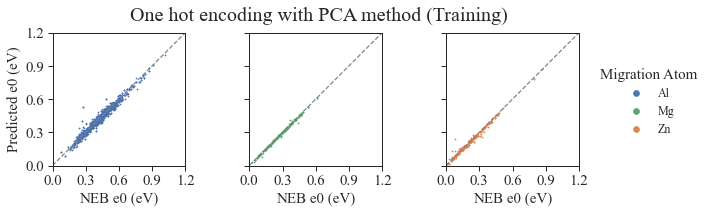

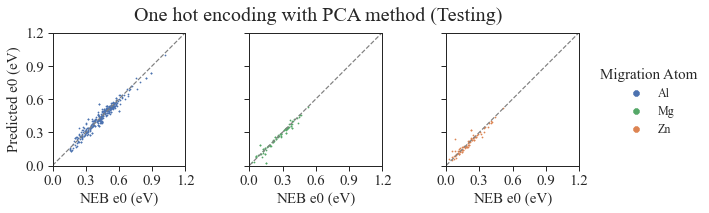

In [21]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])))
###########################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])))

rmse train 0.05457328922557738
rmse test 0.06314918638168178


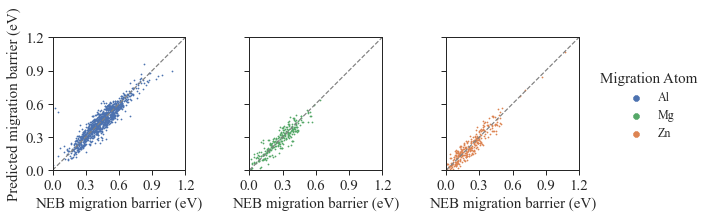

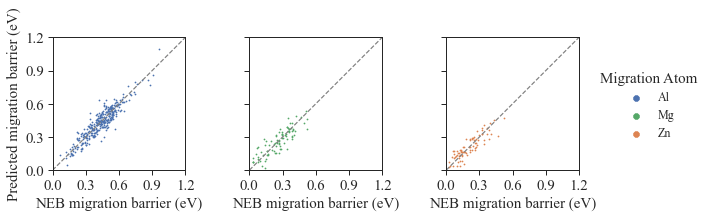

In [22]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])))

In [23]:
js_dist = {
    'Al' : {'transform_matrix' :  U_Al[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Al.tolist(), 'mean_y': mean_y_Al.tolist(), 'theta': theta_Al.tolist()},
    'Mg' : {'transform_matrix' :  U_Mg[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Mg.tolist(), 'mean_y': mean_y_Mg.tolist(), 'theta': theta_Mg.tolist()},
    'Zn' : {'transform_matrix' :  U_Zn[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Zn.tolist(), 'mean_y': mean_y_Zn.tolist(), 'theta': theta_Zn.tolist()},
    'Bond' : {'theta' : theta.tolist()}}
with open('kmc_parameters.json', 'w') as outfile:
    json.dump(js_dist, outfile)

<AxesSubplot:xlabel='e0', ylabel='Count'>

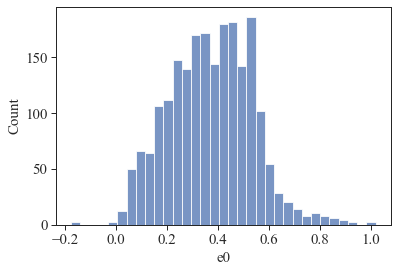

In [24]:
sns.histplot(data = df[:2260], x='e0')

<AxesSubplot:>

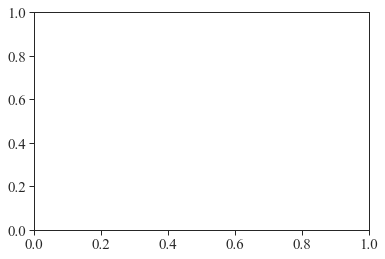

In [25]:
sns.histplot(data = df[2260:], x='e0')

In [26]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,1663.500000,0.371344,0.000000,0.371344,-902.960795,-902.960795,-902.961382,0.372036,0.000000,0.372036
std,308.377103,0.170057,0.093385,0.163521,22.613573,22.613573,22.604617,0.161434,0.106075,0.169923
min,1130.000000,-0.192019,-0.509654,-0.176685,-937.655003,-937.655003,-937.761526,-0.001508,-0.411131,-0.072820
25%,1396.750000,0.252368,-0.053143,0.251968,-918.422086,-918.422086,-918.420900,0.250133,-0.072130,0.246984
50%,1663.500000,0.377587,0.000000,0.372742,-901.247888,-901.247888,-901.050374,0.379236,0.000000,0.375379
75%,1930.250000,0.492289,0.053143,0.487615,-880.189325,-880.189325,-880.199733,0.493000,0.072130,0.491788
max,2197.000000,1.076240,0.509654,1.019899,-832.128269,-832.128269,-832.315194,1.011894,0.411131,1.112855
